# PCA analysis on Nisei Matrix

Given the nisei_matrix.csv, run PCA analysis to figure out which lemma/tokens should be used for clustering


_why PCA (principal component analysis)?_
1. saves data / space
2. quicker running time
3. reduces overfitting (and thus overtraining) 

In [1]:
# libraries and such 

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style()

# PCA libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
data = (pd.read_csv('nisei_matrix.csv', 
                    index_col = 0)) # if you don't say this, you get 2 columns of indeces

data.head()

,オ,座,把,あー,十,万,り,世,六,七,...,ハ,代表,将来,出,他,君,東,地,母,我
0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scaling the Data

We scale the data so the average is 0 and the sum is 1. this is so all attributes carry equal weight. Because of the nature of this matrix, it won't matter much but will be useful to do anyway incase we add a distance metric to the values in our matrix that will skew the averages. 

In [10]:
# making scaler:

scaling = StandardScaler() 

# fit the standardizer then scale the data 
scaling.fit(data)
scaled_data = scaling.transform(data)

## Determining the Number of Components for our data 

with this, we can choose different number of components we want

In [13]:
# setting the components: 

n = len(data.columns) # this is the maximum value of n 

principal = PCA(n_components = n)
principal.fit(scaled_data)
X = principal.transform(scaled_data)

In [14]:
X.shape # see how the shape is unchanged, now we can check the components 

(400, 176)

In [49]:
principal.components_.shape

(176, 176)

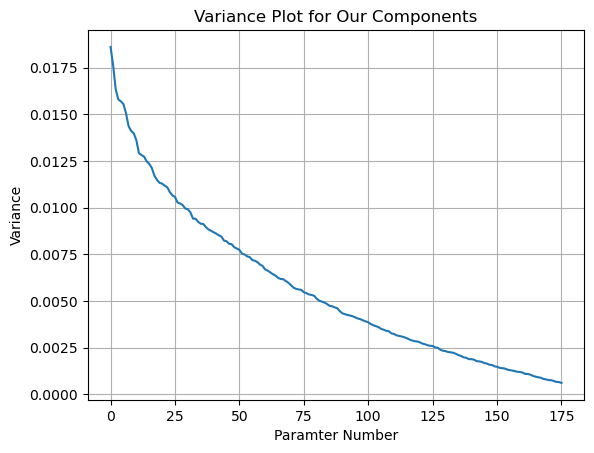

In [22]:
plt.plot(np.arange(0,n),principal.explained_variance_ratio_)
plt.title('Variance Plot for Our Components')
plt.xlabel('Paramter Number')
plt.grid()
plt.ylabel('Variance');

_based off of inspection, it is difficult to tell where the "elbow" of the arm is, but I will say roughly 50 is a good number to pick_

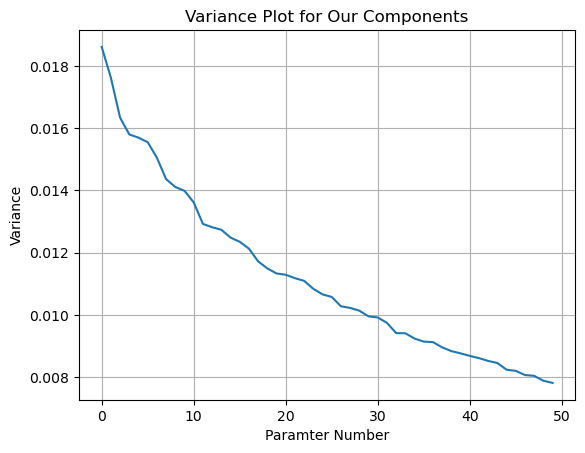

In [97]:
# so let's plot just the first 50 and see how it looks again: 

plt.plot(np.arange(0,50),principal.explained_variance_ratio_[0:50])
plt.title('Variance Plot for Our Components')
plt.xlabel('Paramter Number')
plt.grid()
plt.ylabel('Variance');

In [66]:
# now we can reduce the size of X to only include the first 50 columns: 
n = 50 
principal = PCA(n_components = n)
principal.fit(scaled_data)
reduced_X = principal.transform(scaled_data)

_You can see that the first principal component has a larger spread than the second component. You can also see that the cluster of values seems to be centered at (0,0), which is good because that means the scaler worked correctly._

In [67]:
PCA_X = pd.DataFrame(reduced_X)

PCA_X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.297362,0.161764,-3.763842,-0.724705,-0.761282,0.867558,1.691873,-3.666698,8.231071,5.070659,...,-0.956167,0.125342,0.060011,1.104083,2.952728,1.884747,-0.797568,-1.882684,-1.157915,-0.279653
1,1.939513,-1.141736,-2.322867,1.633540,-0.526062,-0.320969,2.895689,-1.487979,0.765127,0.181460,...,-1.760210,-2.843290,-0.620320,0.599344,0.382427,0.043196,0.248092,-0.238000,-1.582187,-1.433254
2,-1.533467,-3.447570,-4.029089,1.767866,2.083558,3.439540,1.134919,0.420134,-2.107443,-0.871273,...,-3.156226,4.123106,0.273882,-0.028380,0.493106,1.298671,-0.843132,-3.417149,-0.152547,-0.652849
3,-1.184107,-1.926672,-1.586118,1.343755,-1.152176,-0.492429,-0.759628,-0.941414,0.539864,-0.749294,...,-0.346424,-1.892862,1.867754,-1.590648,-0.763199,-1.154826,0.692884,0.982729,-0.778976,-1.254824
4,-1.289907,-0.485261,-1.993730,1.685751,-0.543080,-2.164052,-0.795044,-0.821921,0.356411,-1.528181,...,-0.273000,0.003263,1.151870,0.019814,-1.297812,-0.385235,0.659729,1.258963,-1.065447,-1.902362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.612562,-0.092720,1.722727,-1.500922,0.345968,-1.359467,-0.370911,0.881556,-0.256423,0.510059,...,-1.350423,0.810006,-0.307418,0.728003,0.578147,0.691763,0.571614,0.648240,1.318459,0.111509
396,-1.153191,-0.726453,0.215100,-1.287135,0.550512,-0.671048,0.752956,1.229033,-0.327717,0.157562,...,0.628164,-1.410236,-1.796950,0.130450,1.952608,1.528788,0.190942,-0.776586,-1.347005,0.471396
397,-2.248591,0.868968,0.320591,0.333410,-1.270525,0.377360,-0.507147,-0.617627,0.661478,0.452029,...,0.317307,-0.007030,0.108493,1.100166,-0.453019,1.811357,2.541776,-0.573453,0.035951,-1.709211
398,-1.238538,0.021225,2.252650,-0.658894,0.067004,-0.481628,0.962119,0.431833,0.263019,-1.345039,...,0.941307,-0.489578,-0.799261,1.533353,0.671352,-0.522547,0.886026,1.150109,0.138598,0.400328


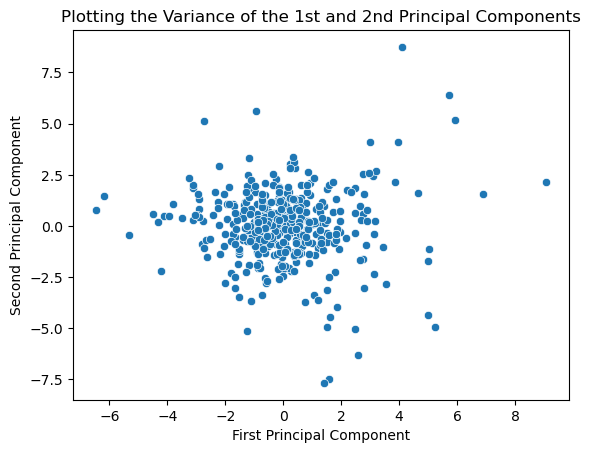

In [96]:
# Let's visualize the first 2 components: 

sns.scatterplot(data = PCA_X, x = 0, y = 1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Plotting the Variance of the 1st and 2nd Principal Components');